<a href="https://colab.research.google.com/github/yash5891/Deep-Learning/blob/main/Image_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision



In [ ]:
from torchvision.datasets import FashionMNIST

In [ ]:
dataset = FashionMNIST(root='data/', download = True, train=True)

dataset

100%|██████████| 26421880/26421880 [00:01<00:00, 17354478.68it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 306698.55it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5627382.87it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12568263.67it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [ ]:
test_dataset = FashionMNIST(root='data/', train=False)
len(test_dataset)

10000

In [ ]:
dataset[1]

(<PIL.Image.Image image mode=L size=28x28>, 0)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 0


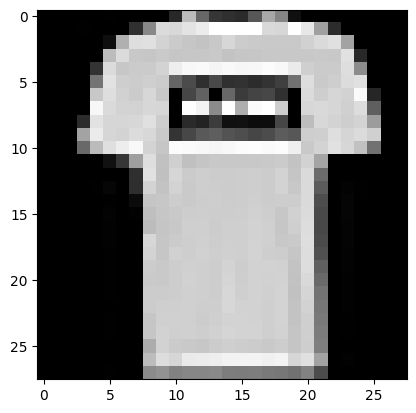

In [ ]:
image, label = dataset[1]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [ ]:
import torchvision.transforms as transforms

In [ ]:
# MNIST dataset (images and labels)
dataset =FashionMNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[1]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 0


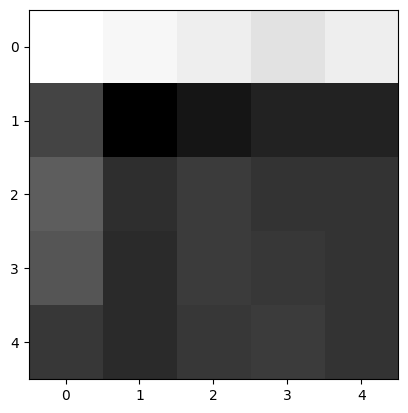

In [ ]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [ ]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)#loading inputs and outputs

In [ ]:
import torch.nn as nn
input_size=28*28
num_classes=10
model=nn.Linear(input_size,num_classes)


In [ ]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0219,  0.0315,  0.0106,  ..., -0.0317,  0.0241,  0.0224],
        [ 0.0161, -0.0291,  0.0216,  ...,  0.0281, -0.0183,  0.0323],
        [-0.0205,  0.0110,  0.0048,  ...,  0.0341,  0.0074,  0.0211],
        ...,
        [ 0.0027,  0.0135, -0.0062,  ...,  0.0006,  0.0068,  0.0114],
        [-0.0087,  0.0009,  0.0224,  ..., -0.0223, -0.0272,  0.0106],
        [ 0.0259, -0.0012,  0.0095,  ...,  0.0271,  0.0094, -0.0178]],
       requires_grad=True)

In [ ]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0257, -0.0139,  0.0068, -0.0164,  0.0149, -0.0003, -0.0252,  0.0210,
         0.0063,  0.0102], requires_grad=True)

In [ ]:
for images, labels in train_loader:

    images = images.reshape(-1, 28*28)
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([4, 0, 9, 3, 1, 9, 6, 6, 0, 8, 2, 5, 0, 9, 5, 2, 2, 4, 0, 6, 8, 4, 9, 7,
        2, 8, 2, 6, 7, 2, 8, 4, 8, 2, 1, 5, 3, 9, 9, 5, 7, 3, 9, 8, 1, 6, 3, 3,
        2, 2, 8, 1, 2, 3, 0, 4, 0, 7, 8, 8, 3, 4, 3, 2, 6, 8, 4, 7, 9, 3, 7, 3,
        2, 2, 7, 5, 7, 7, 1, 4, 6, 5, 0, 5, 3, 2, 2, 6, 1, 3, 3, 2, 4, 0, 3, 7,
        6, 0, 5, 6, 5, 8, 3, 1, 5, 5, 3, 7, 1, 3, 9, 2, 4, 5, 5, 9, 6, 8, 1, 2,
        2, 5, 8, 4, 5, 7, 7, 7])
torch.Size([128, 784])
tensor([[-0.3929,  0.1735, -0.1317,  ...,  0.4483,  0.0717, -0.2903],
        [-0.0372, -0.1693, -0.3177,  ..., -0.0235, -0.4560, -0.6190],
        [-0.0823, -0.1618,  0.0068,  ..., -0.0515,  0.1632, -0.2433],
        ...,
        [-0.1420, -0.0549, -0.1066,  ...,  0.0414,  0.2430, -0.2546],
        [-0.0326, -0.2018, -0.1519,  ...,  0.1219,  0.0280, -0.2746],
        [ 0.0406, -0.0451, -0.0284,  ..., -0.0439,  0.1755, -0.1125]],
       grad_fn=<AddmmBackward0>)


In [ ]:
images.shape

torch.Size([128, 784])

In [ ]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = torch.sigmoid(self.linear(xb))
        return out

model = MnistModel()

In [ ]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0232,  0.0147, -0.0233,  ..., -0.0183,  0.0216, -0.0145],
         [ 0.0018, -0.0061,  0.0067,  ...,  0.0073,  0.0147, -0.0137],
         [ 0.0330, -0.0074, -0.0098,  ...,  0.0152, -0.0003, -0.0017],
         ...,
         [-0.0007,  0.0061, -0.0283,  ..., -0.0165,  0.0151, -0.0095],
         [-0.0197,  0.0243, -0.0059,  ...,  0.0018, -0.0232, -0.0169],
         [-0.0249,  0.0130, -0.0061,  ..., -0.0230,  0.0164,  0.0117]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0069, -0.0288,  0.0039, -0.0178, -0.0084, -0.0095, -0.0056,  0.0065,
         -0.0072,  0.0255], requires_grad=True)]

In [ ]:
for images , labels in train_loader:
  print(images.shape)
  outputs=model(images)
  break
print( 'outputs.shape : ' ,outputs.shape)
print('Sample outputs :\n',outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[0.5604, 0.4971, 0.5673, 0.4639, 0.4695, 0.5117, 0.5280, 0.5363, 0.4056,
         0.3682],
        [0.5607, 0.4588, 0.5088, 0.4870, 0.4282, 0.4680, 0.5682, 0.5296, 0.5249,
         0.5286]])


In [ ]:
max_probs, preds = torch.max(outputs, dim=1)
print(preds)
print(max_probs)

tensor([2, 6, 6, 6, 0, 0, 6, 0, 9, 7, 2, 0, 7, 2, 5, 6, 0, 6, 6, 6, 4, 0, 7, 5,
        7, 0, 0, 7, 6, 0, 2, 6, 6, 0, 0, 6, 0, 7, 6, 8, 2, 0, 6, 0, 0, 0, 0, 6,
        0, 0, 6, 7, 5, 0, 0, 5, 8, 0, 0, 0, 6, 0, 3, 5, 6, 5, 0, 6, 7, 7, 6, 2,
        2, 7, 7, 0, 5, 1, 6, 6, 6, 0, 2, 9, 6, 2, 0, 2, 0, 0, 1, 1, 0, 8, 3, 7,
        6, 8, 0, 0, 7, 6, 6, 4, 0, 0, 0, 0, 0, 6, 0, 3, 6, 0, 0, 0, 5, 3, 6, 0,
        6, 8, 0, 3, 7, 7, 6, 0])
tensor([0.5673, 0.5682, 0.5379, 0.5915, 0.5890, 0.5546, 0.5231, 0.5397, 0.5391,
        0.5396, 0.5735, 0.5463, 0.6105, 0.5684, 0.5871, 0.5588, 0.5392, 0.5397,
        0.4967, 0.5597, 0.5609, 0.5891, 0.5621, 0.5981, 0.5877, 0.5700, 0.5417,
        0.5479, 0.6011, 0.6090, 0.5289, 0.5357, 0.5906, 0.5853, 0.6359, 0.5343,
        0.6048, 0.5393, 0.5725, 0.5325, 0.5797, 0.5990, 0.5784, 0.5659, 0.5181,
        0.6213, 0.5578, 0.5565, 0.6228, 0.5676, 0.5789, 0.5458, 0.5822, 0.6229,
        0.5269, 0.5988, 0.5779, 0.5235, 0.6161, 0.5935, 0.5450, 0.5840, 0.5552,
       

In [ ]:
def accuracy(outputs, labels):

    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
accuracy(outputs, labels)

tensor(0.0859)

In [ ]:
import torch.nn.functional as F

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2924, grad_fn=<NllLossBackward0>)


In [ ]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    # correct = 0
    total = 0
    correct = 0
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        epoch_loss = 0
        epoch_acc = 0
        # Train with batches of data
        for xb,yb in train_dl:


            # 1. Generate predictions
            pred = model(xb)

            # 2. Calculate loss
            loss = loss_fn(pred, yb)


            acc = accuracy(pred, yb)

            # 3. Compute gradients
            loss.backward()

            # 4. Update parameters using gradients
            opt.step()

            # 5. Reset the gradients to zero
            opt.zero_grad()

            epoch_loss += loss.item()

        # Print the progress
        if (epoch+1) % 10 == 0:

            print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}'.format(epoch+1, num_epochs, loss.item(), acc))

In [ ]:
fit(100, model, loss_fn, opt, train_loader)

Epoch [10/100], Loss: 2.2814, Accuracy: 0.19
Epoch [20/100], Loss: 2.2715, Accuracy: 0.19
Epoch [30/100], Loss: 2.2666, Accuracy: 0.20
Epoch [40/100], Loss: 2.2642, Accuracy: 0.28
Epoch [50/100], Loss: 2.2546, Accuracy: 0.32
Epoch [60/100], Loss: 2.2458, Accuracy: 0.31


KeyboardInterrupt: 

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

    def evaluate(self, val_loader):
      outputs = [self.validation_step(batch) for batch in val_loader]
      return self.validation_epoch_end(outputs)


model = MnistModel()

In [ ]:
history0 = model.evaluate(val_loader)

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = model.evaluate(val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [ ]:
history1 = fit(5, 0.00010, model, train_loader, val_loader)

Epoch [0], val_loss: 2.2131, val_acc: 0.2037
Epoch [1], val_loss: 2.1320, val_acc: 0.2760
Epoch [2], val_loss: 2.0624, val_acc: 0.3453
Epoch [3], val_loss: 2.0000, val_acc: 0.4208
Epoch [4], val_loss: 1.9431, val_acc: 0.4807


In [ ]:
history2 = fit(5, 0.00010, model, train_loader, val_loader)

Epoch [0], val_loss: 1.8907, val_acc: 0.5244
Epoch [1], val_loss: 1.8421, val_acc: 0.5557
Epoch [2], val_loss: 1.7969, val_acc: 0.5739
Epoch [3], val_loss: 1.7547, val_acc: 0.5909
Epoch [4], val_loss: 1.7154, val_acc: 0.6016


In [ ]:
history3 = fit(5, 0.00010, model, train_loader, val_loader)

Epoch [0], val_loss: 1.6786, val_acc: 0.6107
Epoch [1], val_loss: 1.6441, val_acc: 0.6195
Epoch [2], val_loss: 1.6118, val_acc: 0.6256
Epoch [3], val_loss: 1.5814, val_acc: 0.6307
Epoch [4], val_loss: 1.5528, val_acc: 0.6355


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

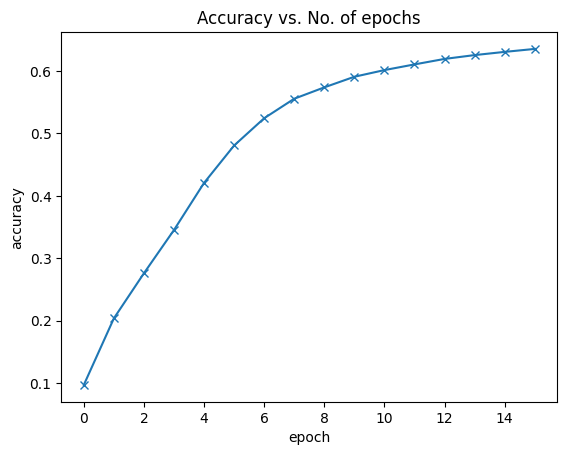

In [ ]:
history = [history0] + history1 + history2 + history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

In [ ]:
test_dataset = FashionMNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 9


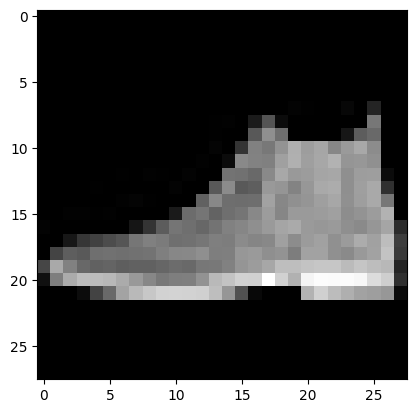

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


Label: 4 , Predicted: 2


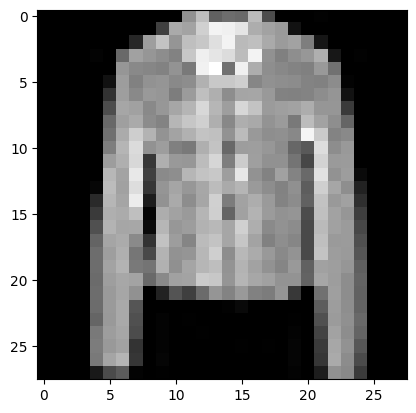

In [ ]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = model.evaluate(test_loader)
result

{'val_loss': 1.5554944276809692, 'val_acc': 0.6324218511581421}

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [ ]:
model.state_dict()


OrderedDict([('linear.weight',
              tensor([[-0.0179,  0.0310,  0.0181,  ..., -0.0061, -0.0253, -0.0061],
                      [ 0.0162, -0.0055,  0.0292,  ..., -0.0316, -0.0096, -0.0009],
                      [-0.0139,  0.0224, -0.0241,  ..., -0.0014,  0.0082,  0.0022],
                      ...,
                      [-0.0220, -0.0302,  0.0271,  ..., -0.0068,  0.0061,  0.0112],
                      [-0.0103, -0.0025,  0.0209,  ..., -0.0093,  0.0065, -0.0010],
                      [ 0.0119,  0.0253,  0.0231,  ..., -0.0017, -0.0060, -0.0141]])),
             ('linear.bias',
              tensor([-0.0200,  0.0374, -0.0250,  0.0020,  0.0232,  0.0510, -0.0232, -0.0139,
                       0.0271, -0.0272]))])

In [ ]:
model2 = MnistModel()

In [ ]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0318,  0.0223,  0.0166,  ...,  0.0237,  0.0078,  0.0223],
                      [ 0.0323,  0.0048,  0.0231,  ...,  0.0220, -0.0164,  0.0062],
                      [-0.0006, -0.0103,  0.0260,  ...,  0.0258,  0.0183, -0.0283],
                      ...,
                      [ 0.0268, -0.0198,  0.0047,  ...,  0.0163, -0.0021,  0.0277],
                      [-0.0003,  0.0215, -0.0208,  ...,  0.0110, -0.0272, -0.0118],
                      [-0.0271, -0.0098,  0.0274,  ...,  0.0158,  0.0082, -0.0298]])),
             ('linear.bias',
              tensor([-0.0041,  0.0044,  0.0064,  0.0196,  0.0163,  0.0139,  0.0169,  0.0160,
                       0.0118, -0.0208]))])

In [ ]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0179,  0.0310,  0.0181,  ..., -0.0061, -0.0253, -0.0061],
                      [ 0.0162, -0.0055,  0.0292,  ..., -0.0316, -0.0096, -0.0009],
                      [-0.0139,  0.0224, -0.0241,  ..., -0.0014,  0.0082,  0.0022],
                      ...,
                      [-0.0220, -0.0302,  0.0271,  ..., -0.0068,  0.0061,  0.0112],
                      [-0.0103, -0.0025,  0.0209,  ..., -0.0093,  0.0065, -0.0010],
                      [ 0.0119,  0.0253,  0.0231,  ..., -0.0017, -0.0060, -0.0141]])),
             ('linear.bias',
              tensor([-0.0200,  0.0374, -0.0250,  0.0020,  0.0232,  0.0510, -0.0232, -0.0139,
                       0.0271, -0.0272]))])

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = model2.evaluate(test_loader)
result

{'val_loss': 1.5554944276809692, 'val_acc': 0.6324218511581421}